In [61]:
##This code is for finding the training error for SGD for 10 independent trials
##regression (squared loss), random design
##2-layer ReLU with weight decay
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import numpy as np

In [279]:
d=2 # dimension of the data
beta=1e-3
num_trials = 30
learning_rate = 0.01

#Adjust variables for each experiment
m=5 # number of neurons
n=5 # number of samples
num_epochs = 6000
optimal_loss =  0.0006222287957940906

#Size of the output plot
y_top=1.0  #upper limit of y in the final plot
y_bottom=5e-4 #lower limit of y in the final plot
x_left=0 #lower limit of x
x_right=num_epochs #upper limit of x

In [280]:
# Define the Neural Network model with 2 layers
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim, bias=False)  # First layer
        self.layer2 = nn.Linear(hidden_dim, output_dim, bias=False)  # Second layer

    def forward(self, x):
        x = torch.relu(self.layer1(x))  # ReLU activation function applied after the first layer
        x = self.layer2(x)  # Output layer (no activation)
        return x

In [281]:
# Set dimensions
input_dim = 2   # 2D input
hidden_dim = m  # Hidden layer dimension
output_dim = 1  # 1D output (binary classification)

In [282]:
# Define Mean Squared Error (MSE) loss and add weight decay (L2 regularization)
criterion = nn.MSELoss()

In [283]:
# Store losses for each trial
all_losses = []


In [284]:
# Track the loss values for plotting

for trial in range(num_trials):
    # Set random seed for reproducibility
    torch.manual_seed(trial)
    np.random.seed(trial)
    # Generate random dataset with n samples
    X = torch.rand(n, 2) * 10 - 5 # Random 2D input in range [-5, 5) times [-5, 5)
    # Create Y based on the first element of each row in X
    Y = torch.where(X[:, 0] > X[:,1], torch.tensor(1), torch.tensor(-1))
    X = X.float()
    Y = Y.float()

    # Initialize model and optimizer
    model = SimpleNN(input_dim, hidden_dim, output_dim)
    # Using SGD optimizer with weight decay
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=beta)  # weight_decay is the L2 penalty
    # Training loop
    trial_losses = []
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()

        trial_losses.append(loss.item()+(beta/2)*sum(param.pow(2).sum().item() for param in model.parameters()))
        # Optionally print loss every 100 epochs
        if (epoch + 1) % num_epochs == 0:
          print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()+(beta/2)*sum(param.pow(2).sum().item() for param in model.parameters()):.4f}')

    all_losses.append(trial_losses)

Epoch [6000/6000], Loss: 0.0234
Epoch [6000/6000], Loss: 0.9643
Epoch [6000/6000], Loss: 0.0038
Epoch [6000/6000], Loss: 0.9610
Epoch [6000/6000], Loss: 0.9663
Epoch [6000/6000], Loss: 0.9613
Epoch [6000/6000], Loss: 0.9648
Epoch [6000/6000], Loss: 0.9689
Epoch [6000/6000], Loss: 0.9615
Epoch [6000/6000], Loss: 0.6414
Epoch [6000/6000], Loss: 0.6923
Epoch [6000/6000], Loss: 0.9618
Epoch [6000/6000], Loss: 0.6442
Epoch [6000/6000], Loss: 0.9609
Epoch [6000/6000], Loss: 0.9609
Epoch [6000/6000], Loss: 0.6511
Epoch [6000/6000], Loss: 0.6444
Epoch [6000/6000], Loss: 0.9718
Epoch [6000/6000], Loss: 0.9642
Epoch [6000/6000], Loss: 0.6410
Epoch [6000/6000], Loss: 0.9611
Epoch [6000/6000], Loss: 0.9613
Epoch [6000/6000], Loss: 0.6410
Epoch [6000/6000], Loss: 0.6420
Epoch [6000/6000], Loss: 0.9700
Epoch [6000/6000], Loss: 0.9612
Epoch [6000/6000], Loss: 0.6484
Epoch [6000/6000], Loss: 0.9767
Epoch [6000/6000], Loss: 0.9607
Epoch [6000/6000], Loss: 0.9616


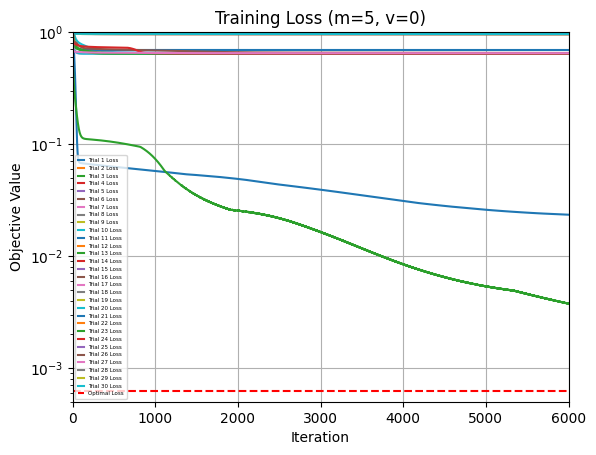

In [285]:
# Plot the log of trial loss over the number of epochs
fig, ax = plt.subplots() # Create a figure and axes object

for trial in range(num_trials):
    ax.plot(range(num_epochs), all_losses[trial], label=f'Trial {trial + 1} Loss', linestyle='-') # Plot on the axes object
ax.set_ylim(bottom=y_bottom, top=y_top)
ax.set_xlim(left=x_left, right=x_right)
ax.set_xlabel('Iteration')
ax.set_ylabel('Objective Value')
ax.set_title(f'Training Loss (m={m}, v=0)')
# Plot a horizontal line indicating the optimal value
ax.axhline(y=optimal_loss, color='r', linestyle='--', label=f'Optimal Loss')

ax.grid(True)

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Display the legend
ax.legend(loc='lower left',prop={'size': 4}, borderpad=0.5, handlelength=1, handleheight=0.5)


plt.show()

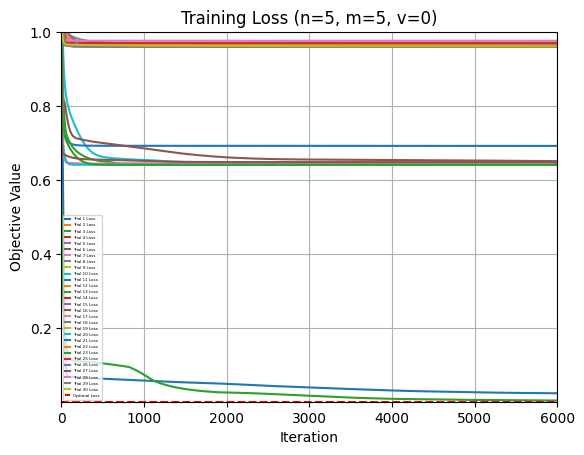

In [286]:
# Plot the loss over the number of epochs
for trial in range(num_trials-7):
    plt.plot(range(num_epochs), all_losses[trial], label=f'Trial {trial + 1} Loss', linestyle='-')
for trial in range(num_trials-6,num_trials):
    plt.plot(range(num_epochs), all_losses[trial], label=f'Trial {trial + 1} Loss', linestyle='-')
plt.ylim(bottom=y_bottom, top=y_top)
plt.xlim(left=x_left, right=x_right)
plt.xlabel('Iteration')
plt.ylabel('Objective Value')
plt.title(f'Training Loss (n={n}, m={m}, v=0)')
# Plot a horizontal line indicating the optimal value
plt.axhline(y=optimal_loss, color='r', linestyle='--', label=f'Optimal Loss')
plt.grid(True)

# Display the legend
plt.legend(loc='lower left',prop={'size': 3}, borderpad=0.5, handlelength=1, handleheight=0.5)

plt.show()

In [287]:
#Set p to see how many trials is over p
p=0.2

# Get the last loss value of each trial (representing the final loss)
final_losses = [trial_losses[-1] for trial_losses in all_losses]
count = sum(1 for loss in final_losses if loss > p)
print(f'The number of trial with training loss over {p}: ',count)

The number of trial with training loss over 0.2:  28
